In [1]:
#import packages we need

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


#read in the data
df = pd.read_csv('movies.csv')

In [2]:
#top 5 row of the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### 1.1 Split Column 'released' into 'relDate' and 'relCountry' columns

Currently, the released date and country are in the same cell. Lets separate them into different columns.

In [3]:
relDtCtry = df['released'].str.split(pat='(', expand = True)
relDtCtry.head()

,0,1
0,"June 13, 1980",United States)
1,"July 2, 1980",United States)
2,"June 20, 1980",United States)
3,"July 2, 1980",United States)
4,"July 25, 1980",United States)


In [4]:
#Joining the above dataframe with our main dataset

df = pd.concat([df, relDtCtry], axis=1)

In [5]:
#rename columns to have meaningful names
df = df.rename(columns= {0:'relDate', 1:'relCountry'})

#remove closing bracket from relCountry
df['relCountry'] = df['relCountry'].astype(str).str.replace(')','')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [6]:
#remove potential leading/trailing whitespaces from relDate & relCountry
stripCol = ['relDate','relCountry']

for col in stripCol:
    df[col] = df[col].astype(str).str.strip()

In [7]:
#deleting the 'released' column
del df['released']

In [8]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


### 1.2 Deleting rows with NaN values (in any column)

In [9]:
#Looking at all rows with >=1 NaN values in any of the columns

df[df.isnull().any(axis=1)]

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
16,Fame,R,Drama,1980,6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0,"May 16, 1980",United States
19,Stir Crazy,R,Comedy,1980,6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0,"December 12, 1980",United States
24,Urban Cowboy,PG,Drama,1980,6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0,"June 6, 1980",United States
25,Altered States,R,Horror,1980,6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0,"December 25, 1980",United States
26,Little Darlings,R,Comedy,1980,6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0,"March 21, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0,"October 23, 2020",United States
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0,"February 7, 2020",United States
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN,"April 27, 2020",Cameroon
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0,"October 1, 2020",United States


Out of 7669 rows, 2247 rows contains NaN values.Delete all rows containing NaN values.

In [10]:
#Counting column-wise NaN values
for col in df.columns:
    print(col,'-',df[col].isnull().sum())

name - 0
rating - 77
genre - 0
year - 0
score - 3
votes - 3
director - 0
writer - 3
star - 1
country - 3
budget - 2171
gross - 189
company - 17
runtime - 4
relDate - 0
relCountry - 0


In [11]:
df = df.dropna()

In [12]:
#cross check to make sure there are no NaN
for col in df.columns:
    print(col,'-',df[col].isnull().sum())

name - 0
rating - 0
genre - 0
year - 0
score - 0
votes - 0
director - 0
writer - 0
star - 0
country - 0
budget - 0
gross - 0
company - 0
runtime - 0
relDate - 0
relCountry - 0


In [13]:
#count total rows remaining after dropping NaN- 
df.count()

name          5421
rating        5421
genre         5421
year          5421
score         5421
votes         5421
director      5421
writer        5421
star          5421
country       5421
budget        5421
gross         5421
company       5421
runtime       5421
relDate       5421
relCountry    5421
dtype: int64

In [14]:
#inconsistency between release year in 'year' vs 'relDate' column

#replace 'year' column values with the year in relDate

df['year'] = df['relDate'].astype(str).str[-4:]

In [15]:
df.head(5)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


In [16]:
#check for duplicate rows

df.duplicated().sum()

0

In [17]:
df.dtypes

name           object
rating         object
genre          object
year           object
score         float64
votes         float64
director       object
writer         object
star           object
country        object
budget        float64
gross         float64
company        object
runtime       float64
relDate        object
relCountry     object
dtype: object

In [18]:
#Changing 'year' from string to int64, so describe() can work with it

df['year'] = df['year'].astype('int64')

In [19]:
df.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.814794,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.550774,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


* Year Range is from Year 1980 to 2020

* Min. Budget = 6 x 10e3, Max. Budget = 3.56 x 10e8

* Min. Gross = 3.0 x 10e2, Max. Gross = 2.84 x 10e9

In [20]:
df.company.unique()

array(['Warner Bros.', 'Columbia Pictures', 'Lucasfilm', ...,
       'Clubhouse Pictures (II)', '20th Century Studios',
       'Beijing Diqi Yinxiang Entertainment'], dtype=object)

In [21]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
5445,Avatar,PG-13,Action,2009,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",United States
7445,Avengers: Endgame,PG-13,Action,2019,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",United States
3045,Titanic,PG-13,Drama,1997,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",United States
7244,Avengers: Infinity War,PG-13,Action,2018,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2015,5.8,3500.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,"January 15, 2015",Sweden
2434,Philadelphia Experiment II,PG-13,Action,1994,4.5,1900.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,"June 4, 1994",South Korea
3681,Ginger Snaps,Not Rated,Drama,2001,6.8,43000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,"May 11, 2001",Canada
272,Parasite,R,Horror,1982,3.9,2300.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,"March 12, 1982",United States


In [22]:
# pd.set_option('display.max_rows',None)

In [23]:
df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States


In [24]:
df['company'].sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
3525                          1492 Pictures
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 5421, dtype: object

In [25]:
df.drop_duplicates()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"January 17, 2020",United States
7649,Sonic the Hedgehog,PG,Action,2020,6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"February 14, 2020",United States
7650,Dolittle,PG,Adventure,2020,5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"January 17, 2020",United States
7651,The Call of the Wild,PG,Adventure,2020,6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"February 21, 2020",United States


In [26]:
df.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",United States
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",United States
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",United States
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",United States
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",United States


<AxesSubplot:xlabel='budget', ylabel='gross'>

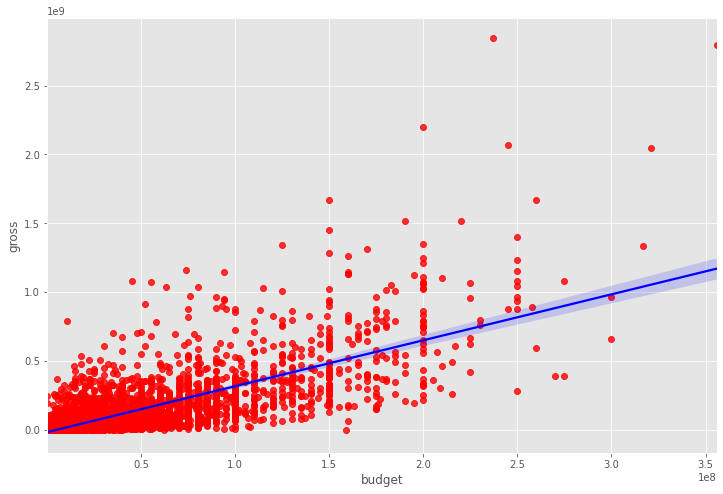

In [27]:
# visualizing the correlation between avg budget and gross of companies
#using seaborn regplot

sns.regplot(x = 'budget', y='gross', data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})


In [28]:
# Let's look at the correlation

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.061923,0.203098,0.320312,0.268721,0.075294
score,0.061923,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.203098,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.320312,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.268721,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075294,0.414068,0.352303,0.318695,0.275796,1.000000


There is high correlation between budget and gross, which implies majority of companies are on average profitable in their production

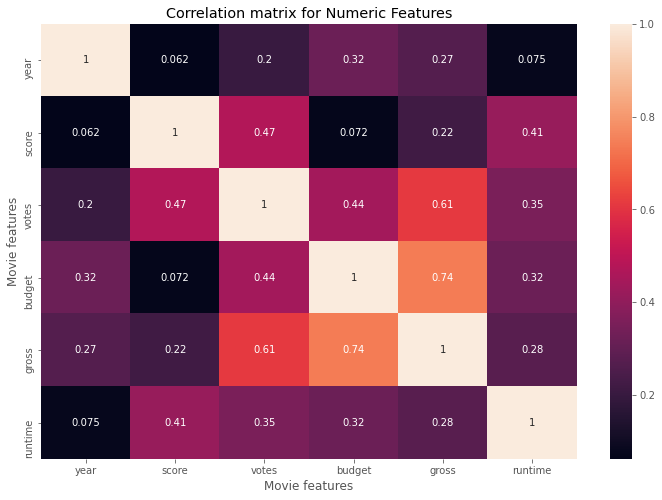

In [29]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [30]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
0,4692,6,6,1980,8.4,927000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,1239,47
1,3929,6,1,1980,5.8,65000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,1065,47
2,3641,4,0,1980,8.7,1200000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,1288,47
3,204,4,4,1980,7.7,221000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,1065,47
4,732,6,4,1980,7.3,108000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,1108,47


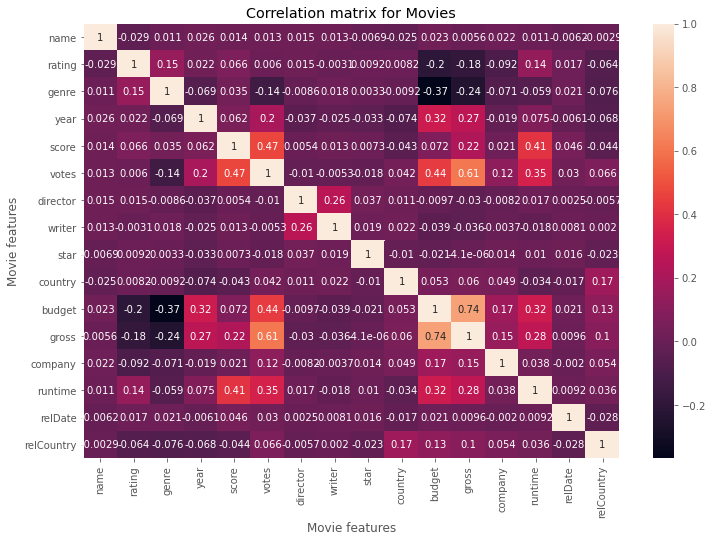

In [31]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [32]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,relDate,relCountry
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.006155,-0.002908
rating,-0.029234,1.000000,0.147796,0.022021,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.017349,-0.063883
genre,0.010996,0.147796,1.000000,-0.069147,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,0.021321,-0.075552
year,0.025542,0.022021,-0.069147,1.000000,0.061923,0.203098,-0.037371,-0.025495,-0.032687,-0.073569,0.320312,0.268721,-0.018806,0.075294,-0.006091,-0.067536
score,0.014450,0.065983,0.035106,0.061923,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.046091,-0.043528
votes,0.012615,0.006031,-0.135990,0.203098,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.029593,0.066105
director,0.015246,0.014656,-0.008553,-0.037371,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.002481,-0.005705
writer,0.012880,-0.003149,0.017578,-0.025495,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,0.008145,0.001983
star,-0.006882,0.009196,0.003341,-0.032687,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,0.015558,-0.023346
country,-0.025490,0.008230,-0.009164,-0.073569,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.017043,0.167894


In [33]:
correlation_mat = df_numerized.corr(method='pearson')
corr_pairs = correlation_mat.unstack()
corr_pairs

name        name          1.000000
            rating       -0.029234
            genre         0.010996
            year          0.025542
            score         0.014450
                            ...   
relCountry  gross         0.100029
            company       0.054484
            runtime       0.036272
            relDate      -0.027614
            relCountry    1.000000
Length: 256, dtype: float64

In [34]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre       budget       -0.368523
budget      genre        -0.368523
gross       genre        -0.244101
genre       gross        -0.244101
budget      rating       -0.203946
                            ...   
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
relDate     relDate       1.000000
relCountry  relCountry    1.000000
Length: 256, dtype: float64

In [35]:
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

gross       votes         0.614751
votes       gross         0.614751
budget      gross         0.740247
gross       budget        0.740247
name        name          1.000000
runtime     runtime       1.000000
company     company       1.000000
gross       gross         1.000000
budget      budget        1.000000
country     country       1.000000
star        star          1.000000
writer      writer        1.000000
director    director      1.000000
votes       votes         1.000000
score       score         1.000000
year        year          1.000000
genre       genre         1.000000
rating      rating        1.000000
relDate     relDate       1.000000
relCountry  relCountry    1.000000
dtype: float64

Conclusion: gross and budget has the highest correlation